Comparing the execution speed of if-else and dictionary control method in creating the Fibonacci series

Import the necessary modules

In [37]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

Create a decorator which adds a functionality of counting the time taken to execute a function

In [2]:
def timer_(func):
    def wrapper(*args,**kwargs):
        start = time.time()
        result = func(*args,**kwargs)
        end = time.time()
        interval = end - start
        return interval
    return wrapper

Our first test, we def the Fibonacci function utilizing the if-else control.

In [3]:
@timer_
def fib_if_else(no):
    lst = [0,1]
    count = 2
    if no == 0:
        return []
    elif no == 1:
        return [0]
    else:
        while count < no:
            new_no = lst[-1] + lst[-2]
            lst.append(new_no)
            count+=1
    return lst

This function is activated only when the number of Fibonacci series exceeds 2, it is an added function to supplement the dict control version

In [4]:
def fib_dict(no):
    lst = [0,1]
    count = 2
    while count < no:
        new_no = lst[-1] + lst[-2]
        lst.append(new_no)
        count+=1
    return lst

The dict control proper

In [5]:
@timer_
def fib_dict_2(no):
    table = {0:[],1:[0],'more':fib_dict(no)}
    return table.get(no,table['more'])

Dictionary comprehension, taking the time of 20 different Fibonacci series function execution

In [17]:
fxy= {a:fib_dict_2(a) for a in range(0,20001,100)}
fxx={a:fib_if_else(a) for a in range(0,20001,100)}

Creating the data for our data frame, the idea is the time represents the columns and the number/length of the Fibonacci series represents the rows

In [18]:
data={'fib_dict':fxy.values(),'fib_if_else':fxx.values()}
index=list(fxy.keys())

Initializing the dataframe

In [19]:
df = pd.DataFrame(data,index=index)

,fib_dict,fib_if_else
0,0.000016,0.000029
100,0.000037,0.000028
200,0.000067,0.000040
300,0.000110,0.000057
400,0.000121,0.000074
...,...,...
19600,0.019070,0.017179
19700,0.018963,0.017686
19800,0.018974,0.017667
19900,0.019575,0.023223


Creating the x axis for the graph, both the scatter and line graph

In [22]:
X1= df['fib_dict'].values
X2= df['fib_if_else'].values

Y axis of our graph

In [25]:
Y=df.index

Here is the line graph

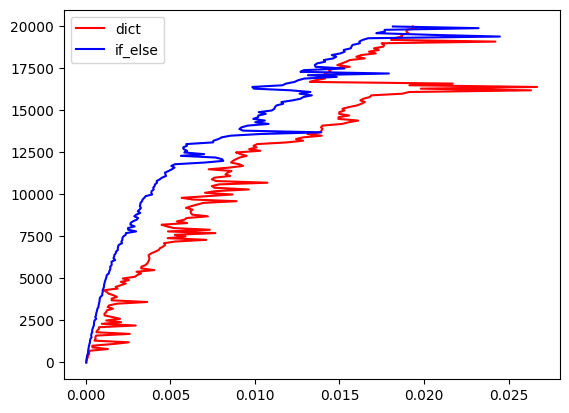

In [39]:
plt.plot(X1,Y,color='red',label='dict')
plt.plot(X2,Y,color='blue',label='if_else')
plt.legend()

Scatter plot

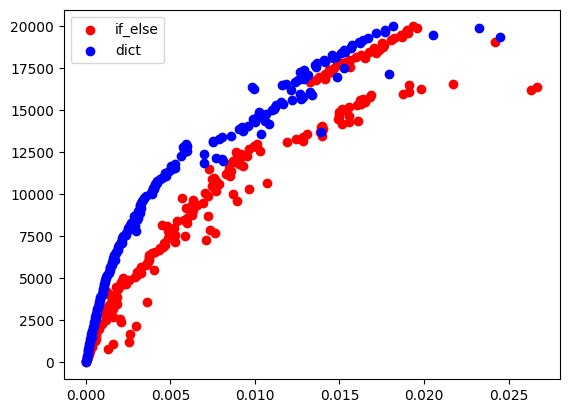

In [38]:
plt.scatter(X1,Y,color='red',label='if_else')
plt.scatter(X2,Y,color='blue',label='dict')
plt.legend()